# Principal Component Analysis (PCA) from scratch

In [52]:
import numpy as np
import sklearn.datasets 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
import pandas as pd
%matplotlib notebook

**Reference:**

"Pattern Recognition and Machine Learning" by C. Bishop, 12.1 p. 561

In this session we are going to implement the Principal Component Analysis (PCA) algorithm from scratch using numpy and its [linear algebra routines](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) implemented in `numpy.linalg`.

It can be defined as:
* PCA is a **linear** dimension-reduction tool that can be used to reduce a large set of features to a small set that still contains most of the *information* in the large set. 

Or, a bit more precisely:
* PCA is a mathematical procedure that **linearly** transforms a number of (possibly) correlated features into a (smaller) number of uncorrelated features called principal components.

It **does NOT require labeled data**, i.e., it is an **unsupervised** algorithm. Traditionally, principal component analysis is performed on a square symmetric matrix. It can be the **Covariance matrix** (scaled sums of squares and cross products), or **Correlation matrix** (sums of squares and cross products from standardized data). The correlation matrix is used if the variances of different features differ much, or if the units of measurement of the features differ.

In order to decrease the dimensionality, a linear projection onto a hyperplane is done. The hyperplane is chosen to **maximize the variance of the data after the projection** (there is an equivalent minimum reconstruction error formulation). This is done projecting onto the subspace generated by the eigenvectors of the covariance matrix with largest eigenvalues.

The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible.

**PCA is a dimensionality reduction or data compression method. The goal is dimension reduction and there is no guarantee that the dimensions are interpretable (a fact often not appreciated).**


### Algorithm

Let's $X_i^{(n)}$ be the features matrix, $n=1,\ldots,N$ the number of samples and $i = 1,\ldots,D$ the number of features. We want to transform them into a lower dimensional space of dimension $M$, generating a reduced features matrix $Z_\alpha^{(n)}$.

**TRAIN PHASE**

1- Calculate the sample covariance matrix
$$
\Sigma_{ij} = \frac{1}{N}\sum_n (X^{(n)}-\bar{X})_i (X^{(n)}-\bar{X})_j \;,
$$
where $\bar{X}$ is the mean value of the feature vectors
$$
\bar{X}_i = \frac{1}{N}\sum_n X_i^{(n)} \;.
$$

2- Calculate the eigenvectors and eigenvalues of the sample covariance matrix. Sort them by eigenvalue.



**PREDICT PHASE**

*Normally, step 3 would be in the training phase, since it defines the algorithm, but once you have calculated the eigenvectors, you can easily project onto different dimension subspaces without calculating them again.*

3- Select the $M$ eigenvectors $v_\alpha$ with largest eigenvalues $\lambda_\alpha$, $\alpha = 1,\ldots,D$.

4- Project onto the $M$ selected eigenvectors
$$
Z_\alpha^{(n)} = \sum_i \left( v_{\alpha i} X_i^{(n)}  \right) \;.
$$

In [38]:
class PCA():
    """Principal component analysis (PCA)
    Linear dimensionality reduction using Singular Value Decomposition of the
    data to project it to a lower dimensional space.
    
    Parameters
    ----------
    n_components : int, float
        Number of components to keep.
    
  
    Attributes
    ----------
    dim_orig : int
        Dimension of the original feature space.
    eigenvectors : np.array, shape (dim_orig, dim_orig)
        Principal axes in feature space, representing the directions of
        maximum variance in the data. The components are sorted by decreasing
        eigenvalue (explained variance).
        indices: ($i$, $\alpha$)
    eigenvalues : np.array, shape (dim_orig,)
        The eigenvalues corresponding to each of the eigenvectors.
    explained_variance_cummulative : np.array, shape (dim_orig,)
        Percentage of variance explained given for arbitrary n_components.
    explained_variance : np.array, shape (dim_orig,)
        Percentage of variance explained for a given n_components.

    n_components : int
        The estimated number of components.
 
    """
    def __init__(self):
        self.dim_orig = None
        self.n_components = None
        self.eigenvalues = None
        self.eigenvectors = None
        self.explained_variance_cummulative = None
        self.explained_variance_percentage = None
        return None
    def train(self,X):
        self.dim_orig = X.shape[1]
        assert X.ndim == 2, 'X does not have ndim 2'
        
        # TODO: Calculate the covariance matrix of the sample
        
        cov = 

        assert cov.shape == (X.shape[1],)*2
        assert (cov == cov.T).all()
        # TODO: Calculate the eigencalues and eigenvectors. Hint: look in np.linalg
        # Remember to save them in decreasing order.

        self.eigenvalues = 
        self.eigenvectors = 
        
        # TODO: Calculate explained_variance_cummulative
        self.explained_variance_cummulative = 
        
        return self
    def apply(self,X,n_components):
        assert type(n_components) is int, 'n_componets is not of type int'
        assert n_components <= self.dim_orig,'n_componets cannot be greater than the number of features'
        self.n_components = n_components
        assert X.ndim == 2, 'X does not have ndim 2'
        assert self.dim_orig == X.shape[1], 'input X does not have the same number of features as the set used for training'
        self.explained_variance_percentage = self.explained_variance_cummulative[n_components-1]
        
        
        # TODO: Project onto the n_components eigenvectros with largest eigenvalues
        X_proj = 
        
        
        assert X_proj.shape == (X.shape[0],n_components)
        return X_proj

## Example of use

In [6]:
X,Y = sklearn.datasets.load_breast_cancer(return_X_y=True)

In [7]:
X.shape

(569, 30)

Explained variance with 2 principal components: 99.8221161374172 %
X_pca.shape : (569, 2)


<IPython.core.display.Javascript object>


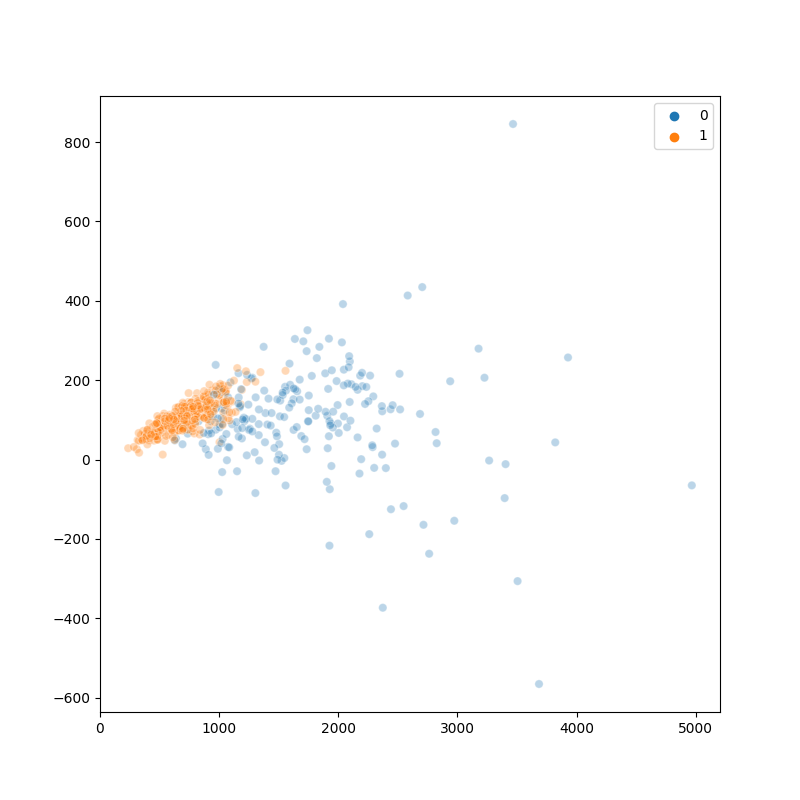

In [66]:
n_components = 2
pca = PCA().train(X)
X_pca = pca.apply(X,n_components)
print('Explained variance with',n_components,'principal components:',100*pca.explained_variance_percentage,'%')
print('X_pca.shape :',X_pca.shape)

plt.figure(figsize=(8,8))
sns.scatterplot(x= X_pca[:,0],y=X_pca[:,1],hue=Y, alpha=0.3)
plt.show()

In this case, the selection of the features was highly determined by the scales of the variables. The features with larger scales are prone to have larger variances, and dominate in the PCA algorithm. This is why is highly recommended to normalize the features beforehand.

Explained variance with 2 principal components: 63.24320765155945 %
X_pca.shape : (569, 2)


<IPython.core.display.Javascript object>


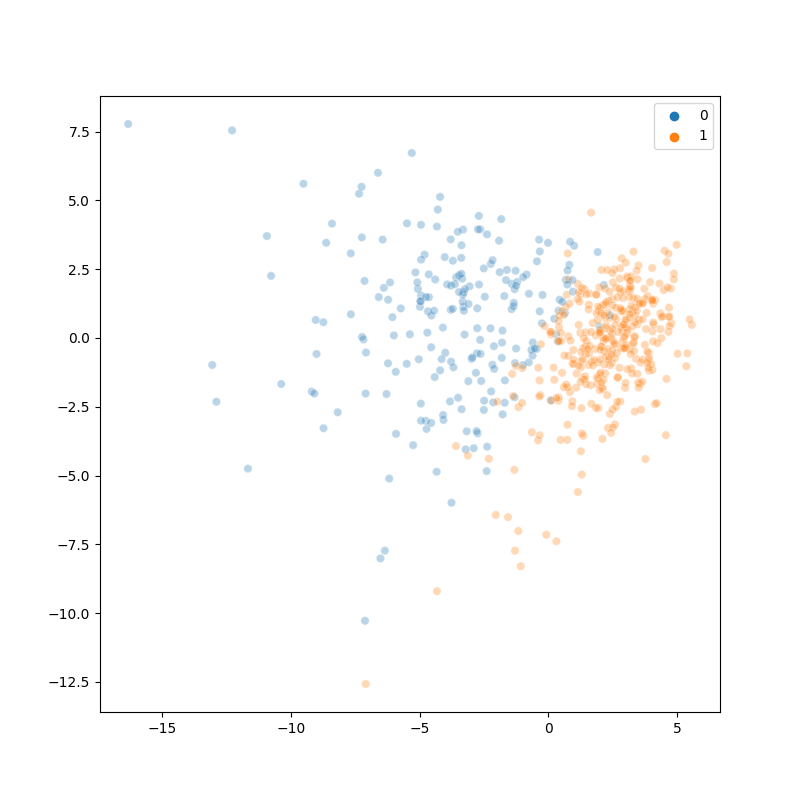

In [65]:
n_components = 2
# Normalize with zero mean and standard deviation equal to one in each feature
X_norm = (X - np.mean(X,axis=0))/np.std(X,axis=0)
pca = PCA().train(X_norm)
X__norm_pca = pca.apply(X_norm,n_components)
print('Explained variance with',n_components,'principal components:',100*pca.explained_variance_percentage,'%')
print('X_pca.shape :',X__norm_pca.shape)

plt.figure(figsize=(8,8))
sns.scatterplot(x= X__norm_pca[:,0],y=X__norm_pca[:,1],hue=Y, alpha=0.3)
plt.show()

## Exercise: Whitening or Sphereing

As we saw in previous lectures, data is usually preprocessed normalizing the features (zero mean, unit variance, scaling between zero and one, ...). 

Instead of using PCA for dimensionality reduction, it can be applied for data preprocessing. Use the previously implemented PCA algorithm to define a function which apply whitening, i.e., it returns data with zero mean and identity matrix covariance.

In [68]:
def spherizer(X):

    return X_sphe

## Spherizer applied

In order to can visualize what is going on, we are going to choose only the first 5 features of the dataset, and see how spherizing can help in a classification task.

In [85]:
X6 = X[:,0:6]
X_sphe = spherizer(X6)

<IPython.core.display.Javascript object>


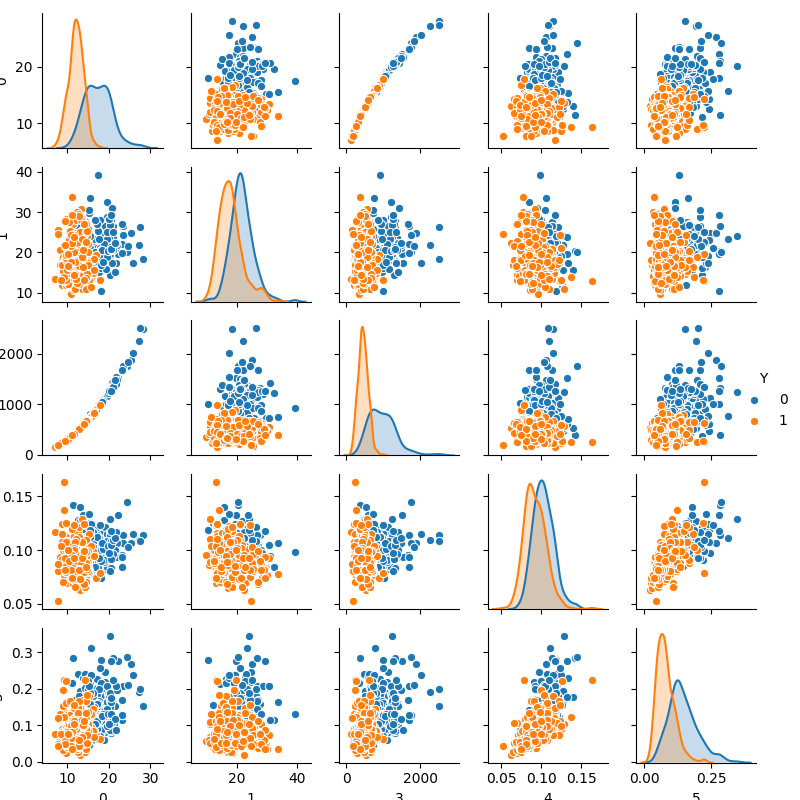

In [86]:
df = pd.DataFrame(X6)
df['Y']=pd.Series(Y)
g = sns.pairplot(df,vars=[0,1,3,4,5],hue='Y')
g.fig.set_size_inches(8,8)
# plt.show()

<IPython.core.display.Javascript object>


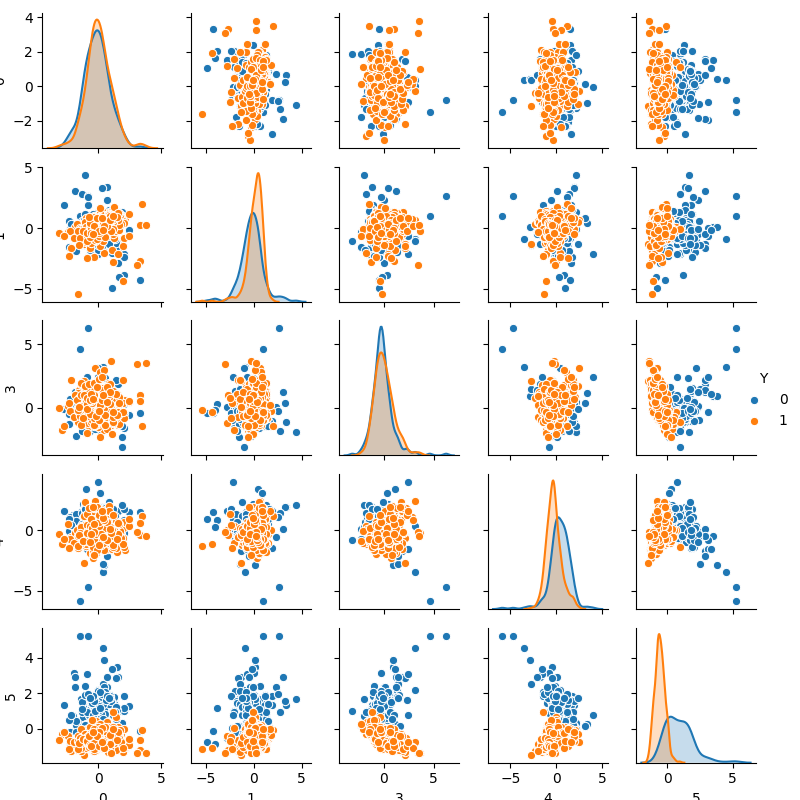

In [87]:
df_sphe = pd.DataFrame(X_sphe)
df_sphe['Y']=pd.Series(Y)
g = sns.pairplot(df_sphe,vars=[0,1,3,4,5],hue='Y')
g.fig.set_size_inches(8,8)

## Exercise: Compare classifiers with and without whitening.

Note: You cannot learn the parameters of the whitening (as the mean, the rotation and the scalings), or any other normalization, from the validation or test sets. They have to be learned from the training set only, and apply the same transformation to the validation and test sets in order to apply the algorithms to them.